# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
import pandas as pd
import seaborn as sns
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot: xlabel='Age', ylabel='Tardies'>

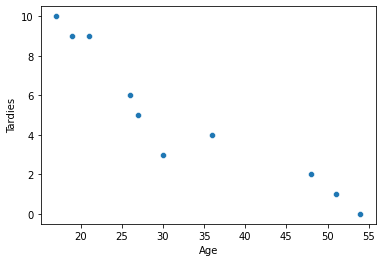

In [4]:
sns.scatterplot(x=student_data.Age, y=student_data.Tardies)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Yes there is a trend; The younger someone is the more often they come late.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [12]:
print(f' The covariance is:  \n {student_data.cov()}')

print(f' The correlation is  \n {student_data.corr()}')

#The difference is that the covariance gives us the direction (positive or negative) between the variables and the correlation gives us this plus the strength of it.

 The covariance is:  
                 Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444
 The correlation is  
               Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [15]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn

lr = LinearRegression()
lr.fit(
    X = student_data[["Age"]], # These are the variables
    y = student_data.Tardies # This is OUR ONE TARGET
)

LinearRegression()

In [16]:
[i for i in dir(lr)][:1]

['__abstractmethods__']

In [18]:
lr.intercept_ 

12.888803363135768

In [20]:
lr.coef_

array([-0.24282077])

In [21]:
student_data["prediction_through_scikitlearn"] = lr.coef_[0] * student_data.Age + lr.intercept_

In [25]:
student_data[["Age", "Tardies", "prediction_through_scikitlearn"]].sample(5)

,Age,Tardies,prediction_through_scikitlearn
4,36,4,4.147256
2,27,5,6.332643
6,19,9,8.275209
8,54,0,-0.223518
3,21,9,7.789567


In [26]:
student_data["error_scikitlearn"] = (student_data.Tardies - student_data.prediction_through_scikitlearn).abs()

In [27]:
student_data[["Age", "Tardies", "prediction_through_scikitlearn", "error_scikitlearn"]].sample(5)

,Age,Tardies,prediction_through_scikitlearn,error_scikitlearn
1,51,1,0.504944,0.495056
3,21,9,7.789567,1.210433
8,54,0,-0.223518,0.223518
7,26,6,6.575463,0.575463
6,19,9,8.275209,0.724791


In [28]:
student_data.error_scikitlearn.mean()

0.9319083427082717

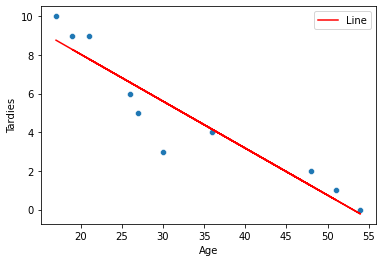

In [39]:
from matplotlib import pyplot as plt

sns.scatterplot(x=student_data.Age, y=student_data.Tardies)
plt.plot(student_data.Age, student_data.prediction_through_scikitlearn, label="Line", color="r")
plt.legend();

Plot your regression model on your scatter plot.

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Yes we can conclude that age is a good predictor of tardiness 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [49]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.sample(1)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
21533,Lincoln,Continental,1985,2.4,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Diesel,17.372045,20,26,22,462.727273,1650


In [50]:
vehicles = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile'] ]
vehicles.sample(1)

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
27002,1992,4.0,15.695714,21,1600,423.190476


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [53]:
print(f' The correlation is  \n {vehicles.corr()}')
# The most important will be Fuel Barrels/Year, the least important is combined MPG

 The correlation is  
                              Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 Emi

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [57]:
lr = LinearRegression()
lr.fit(
    X = vehicles[["Fuel Barrels/Year"]], # These are the variables
          Y = [['CO2 Emission Grams/Mile']] # This is OUR ONE TARGET
)
[i for i in dir(lr)][:1]
lr.intercept_ 
lr.coef_


array([[26.2836254]])

In [62]:
vehicles["prediction_through_scikitlearn"] = lr.coef_[0] * vehicles["Fuel Barrels/Year"] + lr.intercept_
vehicles["error_scikitlearn"] = (vehicles['CO2 Emission Grams/Mile'] - vehicles.prediction_through_scikitlearn).abs()
vehicles.error_scikitlearn.mean()

3.7711245563861677

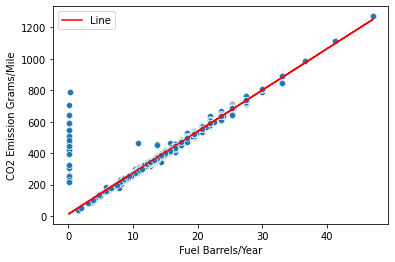

In [63]:

sns.scatterplot(x=vehicles["Fuel Barrels/Year"], y=vehicles['CO2 Emission Grams/Mile'])
plt.plot(vehicles["Fuel Barrels/Year"], vehicles["prediction_through_scikitlearn"], label="Line", color="r")
plt.legend();

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [72]:
vehicles.rename(columns={'CO2_Emission_Grams/Mile': 'CO2_Emission_Grams_Mile',
                   'Fuel_Barrels/Year': 'Fuel_Barrels_Year',
                   'Combined_MPG': 'Combined_MPG',
                   'Fuel_Cost/Year': 'Fuel_Cost_Year'},
          inplace=True, errors='raise')

In [70]:
vehicles.sample(1)

,Year,Cylinders,Fuel_Barrels/Year,Combined_MPG,Fuel_Cost/Year,CO2_Emission_Grams/Mile,prediction_through_scikitlearn,error_scikitlearn
26461,2001,6.0,21.974,15,2200,592.466667,590.042905,2.423761


In [73]:
smf.ols("CO2_Emission_Grams_Mile ~ Fuel_Barrels_Year + Combined_MPG + Fuel_Cost_Year + Cylinders + Year", data=vehicles).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                             16:15:22   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           769.8883     19.392     39.702      0.000     731.880     807.897
Fuel_Barrels_Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined_MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel_Cost_Year        0.0323      0.000     67.025      0.000       0.031       0.033
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.783
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [79]:
party = pd.DataFrame({'invited': [1,3,4,6,8,9,11,14], 'attended': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [83]:
lr = LinearRegression()
lr.fit(
    X = party[["invited"]], # These are the variables
    y = party.attended # This is OUR ONE TARGET
)
[i for i in dir(lr)][:1]
lr.intercept_ 
lr.coef_
party["prediction_through_scikitlearn"] = lr.coef_[0] * party.invited + lr.intercept_
party[["invited", "attended", "prediction_through_scikitlearn"]].sample(5)
party["error_scikitlearn"] = (party.attended - party.prediction_through_scikitlearn).abs()
party[["invited", "attended", "prediction_through_scikitlearn", "error_scikitlearn"]].sample(5)
party.error_scikitlearn.mean()

0.7992424242424243

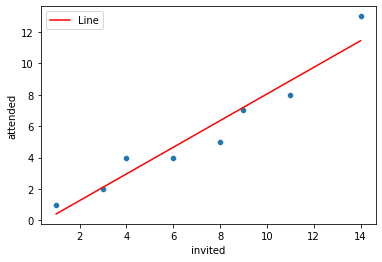

In [84]:
sns.scatterplot(x=party.invited, y=party.attended)
plt.plot(party.invited, party.prediction_through_scikitlearn, label="Line", color="r")
plt.legend();

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [85]:
#There is a relationship between the amount of people invited and the amount of people that attend the party. 
smf.ols("attended ~ invited", data=party).fit().summary()

c:\Users\Tim_K\miniconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               attended   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           0.000102
Time:                        16:30:59   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4394      0.759     -0.579      0.584      -2.297       1.418
invited        0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

C:\Users\Tim_K\AppData\Local\Temp\ipykernel_6232\2370096392.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  party2["prediction_through_scikitlearn"] = lr.coef_[0] * party2.invited + lr.intercept_
C:\Users\Tim_K\AppData\Local\Temp\ipykernel_6232\2370096392.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  party2["error_scikitlearn"] = (party2.attended - party2.prediction_through_scikitlearn).abs()


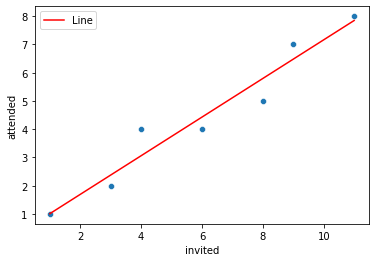

In [88]:
party2 = party[:7]
lr = LinearRegression()
lr.fit(
    X = party2[["invited"]], # These are the variables
    y = party2.attended # This is OUR ONE TARGET
)
[i for i in dir(lr)][:1]
lr.intercept_ 
lr.coef_
party2["prediction_through_scikitlearn"] = lr.coef_[0] * party2.invited + lr.intercept_
party2[["invited", "attended", "prediction_through_scikitlearn"]].sample(5)
party2["error_scikitlearn"] = (party2.attended - party2.prediction_through_scikitlearn).abs()
party2[["invited", "attended", "prediction_through_scikitlearn", "error_scikitlearn"]].sample(5)
party2.error_scikitlearn.mean()
sns.scatterplot(x=party2.invited, y=party2.attended)
plt.plot(party2.invited, party2.prediction_through_scikitlearn, label="Line", color="r")
plt.legend();

In [89]:
smf.ols("attended ~ invited", data=party2).fit().summary()

c:\Users\Tim_K\miniconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               attended   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           0.000264
Time:                        16:38:35   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3233      0.513      0.630      0.556      -0.996       1.642
invited        0.6842      0.075      9.127      0.000       0.492       0.877
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.689
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.379
Skew:                           0.284   Prob(JB):                        0.827
Kurtosis:                       2.012   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
#Without the outlier the prediction line is between all data points, it is more accurate, the error is smaller. 